In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os.path
import zipfile

In [7]:
def read_data():
    '''
    The repo contains the data in a zipped file to save some space,
    this function will automatically extract the csv from that zip 
    if it has not already been extracted and return the data in a DataFrame
    '''
    name = './data/ged171'

    # unzip csv if not unzipped
    if not os.path.isfile(name+'.csv'):
        zip_ = zipfile.ZipFile(name+'.zip', 'r')
        zip_.extractall('./data/')
        zip_.close()

    return pd.read_csv(name+'.csv')

df = read_data()

## Some statistics

In [36]:
# Most conflicts per party on side a
df.groupby('side_a')['id'].count() \
                    .reset_index() \
                    .sort_values('id', ascending=False).head(10)

,side_a,id
253,Government of Afghanistan,21562
284,Government of India,10033
287,Government of Iraq,4896
307,Government of Nepal,4524
336,Government of Turkey,4461
328,Government of Sri Lanka,4184
311,Government of Pakistan,3962
254,Government of Algeria,3770
318,Government of Russia (Soviet Union),3554
268,Government of Colombia,3459


In [37]:
# Most conflicts per party on side b
df.groupby('side_b')['id'].count() \
                    .reset_index() \
                    .sort_values('id', ascending=False).head(10)

,side_b,id
72,Civilians,28355
598,Taleban,19388
259,Kashmir insurgents,5763
208,IS,5196
445,PKK,4400
276,LTTE,4016
66,CPN-M,3699
592,TTP,3493
104,FARC,2866
24,Al-Shabaab,2574


In [45]:
# Most conflicts between two parties
df.groupby(['side_a', 'side_b'])['id'].count() \
    .reset_index() \
    .sort_values('id', ascending=False).head(10)

,side_a,side_b,id
350,Government of Afghanistan,Taleban,19297
495,Government of India,Kashmir insurgents,5763
727,Government of Turkey,PKK,4364
521,Government of Iraq,IS,4103
696,Government of Sri Lanka,LTTE,4008
604,Government of Nepal,CPN-M,3699
628,Government of Pakistan,TTP,3429
428,Government of Colombia,FARC,2731
677,Government of Somalia,Al-Shabaab,2470
1118,Supporters of ANC,Supporters of IFP,1909


Field __best__: 

The best (most likely) estimate of total fatalities resulting from an event. It is always the sum of deaths_a, deaths_b, deaths_civilians and deaths_unknown.

In [58]:
# death toll by single incident
df[['conflict_name', 'side_a', 'side_b', 'best']] \
    .sort_values('best', ascending=False).head(10)

,conflict_name,side_a,side_b,best
28003,Government of Rwanda - Civilians,Government of Rwanda,Civilians,300559
21158,Government of Eritrea-Government of Ethiopia,Government of Eritrea,Government of Ethiopia,48183
25498,Government of Rwanda - Civilians,Government of Rwanda,Civilians,40000
21145,Government of Eritrea-Government of Ethiopia,Government of Eritrea,Government of Ethiopia,30000
25131,Government of Rwanda - Civilians,Government of Rwanda,Civilians,27500
81627,Government of Rwanda - Civilians,Government of Rwanda,Civilians,20000
25025,Government of Rwanda - Civilians,Government of Rwanda,Civilians,16890
21144,Government of Eritrea-Government of Ethiopia,Government of Eritrea,Government of Ethiopia,15000
20586,Government of Rwanda - Civilians,Government of Rwanda,Civilians,12000
82415,Government of Rwanda - Civilians,Government of Rwanda,Civilians,11170


In [66]:
# death toll by prolonged conflict
df[['conflict_name', 'side_a', 'side_b', 'best']] \
    .groupby(['conflict_name']) \
    .sum() \
    .reset_index() \
    .sort_values('best', ascending=False).head(10)

,conflict_name,best
435,Government of Rwanda - Civilians,511531
45,Afghanistan:Government,162045
405,Government of Eritrea-Government of Ethiopia,97435
906,Sri Lanka (Ceylon):Eelam,60816
546,Iraq:Government,52501
909,Sudan:Government,48938
281,Ethiopia:Eritrea,43470
282,Ethiopia:Government,41908
7,AFDL - Civilians,35126
81,Angola:Government,30222


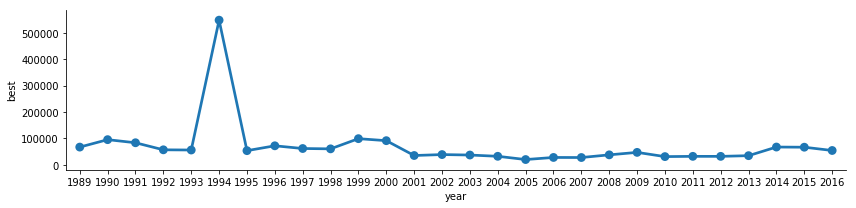

In [99]:
# death toll by year
deaths_by_year = df[['year', 'best', 'type_of_violence']] \
    .groupby(['year']) \
    .sum() \
    .reset_index()
    
g = sns.factorplot(
    x='year', y='best', 
    data=deaths_by_year, 
    kind='point',
    size=3, aspect=4
)

In [124]:
# conflicts by duration
by_duration = df[['year', 'conflict_name']] \
    .groupby('conflict_name', as_index=False)[['year']] \
    .aggregate(lambda x: max(set(x)) - min(set(x))) \
    .sort_values('year', ascending=False)

by_duration.head(10)

,conflict_name,year
528,India:Assam,27
903,Somalia:Government,27
432,Government of Philippines - Civilians,27
401,Government of DR Congo (Zaire) - Civilians,27
220,Colombia:Government,27
731,Myanmar (Burma):Kachin,27
809,Philippines:Government,27
810,Philippines:Mindanao,27
724,Mozambique:Government,27
532,India:Kashmir,27


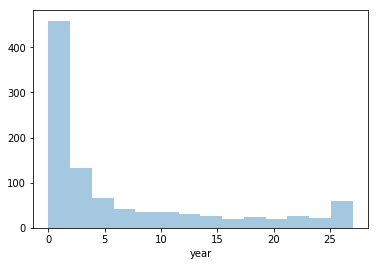

In [127]:
sns.distplot(by_duration['year'], kde=False)